# Importaciones de librerías

In [15]:
import pandas as pd
import pickle


from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from src.modeling.utils.utils import print_scores
from src.modeling.utils.utils import drop_dataset_unnecessary_columns
from src.modeling.utils.utils import train_test_model
from src.preparation.data_access.obtained_text_da import ObtainedTextDA
from src.processing.constants import BASE_DIRECTORY

# Constantes

Se obtendrán aquí todos los documentos de todos los dominios/categorías.

In [16]:
OT_DA = ObtainedTextDA()
TEXTS = OT_DA.select_all_as_dataframe().drop(columns=['cluster_grade'])
TEST_SIZE = 0.2
DATA_COLUMNS = [c for c in TEXTS.columns if c not in ['category', 'filename', 'grade', 'id']]
TEXTS

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,category,filename,grade,id
0,5.595524,0.532907,56.754596,17.319478,30.109246,3.197442,0.099526,0.079630,0.236967,0.148887,...,0.000000,0.000000,0.000000,2.398082,10.125233,110.578204,"Historia, Geografía y Economía",atahualpa.txt,1.0,1.0
1,4.526167,0.848656,56.294201,13.861386,33.663366,3.394625,0.159722,0.119540,0.291667,0.197797,...,0.565771,0.000000,0.848656,2.545969,8.769448,94.766620,"Historia, Geografía y Economía",avelino_caceres.txt,1.0,2.0
2,1.737619,0.000000,59.079062,11.294526,40.834057,5.212858,0.026316,0.019822,0.197368,0.150034,...,0.000000,0.000000,5.212858,1.737619,9.556907,149.435274,"Historia, Geografía y Economía",cartilla_fenomeno_nino.txt,1.0,3.0
3,1.765225,1.765225,64.430715,12.356575,44.130627,4.413063,0.035714,0.039216,0.166667,0.142577,...,0.000000,0.000000,9.708738,0.000000,9.708738,151.809356,"Historia, Geografía y Economía",cartilla_inundaciones.txt,1.0,4.0
4,5.965697,0.248571,52.945563,13.422819,30.325628,2.982849,0.151515,0.171011,0.430303,0.273384,...,0.000000,0.000000,0.000000,1.739995,10.688541,93.711161,"Historia, Geografía y Economía",enrique_meiggs.txt,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,10.168675,1.012048,60.096386,15.084337,24.626506,9.204819,0.153777,0.113482,0.229317,0.130330,...,12.144578,2.650602,15.180723,2.409639,20.192771,118.265060,Comunicación,seis_personajes_busca.txt,2.0,179.0
179,8.489796,0.593692,56.653061,15.762523,25.751391,6.055659,0.072211,0.051115,0.170490,0.105130,...,10.241187,0.044527,2.077922,1.128015,9.261596,108.897959,Comunicación,viaje_centro_tierra.txt,2.0,180.0
180,8.669041,0.941620,74.623352,19.456726,40.274707,5.281258,0.328918,0.254774,0.546726,0.382347,...,20.848686,0.194465,0.020470,3.531073,13.745599,114.120200,Comunicación,viajes_gulliver.txt,2.0,181.0
181,4.147928,0.218312,82.958564,22.355150,52.045584,4.191591,0.287313,0.192939,0.375622,0.225790,...,22.879099,0.480286,2.357770,2.969043,22.922761,102.606645,Comunicación,vida_lazarillo_tormes.txt,2.0,182.0


# Experimento de aprendizaje supervisado

En esta sección se entrenarán los modelos de aprendizaje supervisado, siendo estos calibrados mediante el método Grid Search sobre la métrica "Accuracy".

## Preprocesando los datos

Se realizará un escalamiento de datos usando la clase MinMaxScaler de scikit learn.

In [17]:
X, y = drop_dataset_unnecessary_columns(TEXTS, ['filename', 'category', 'grade', 'id'], 'grade')
X[DATA_COLUMNS] = MinMaxScaler().fit_transform(X[DATA_COLUMNS])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=TEST_SIZE, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((146, 48), (37, 48), (146,), (37,))

## Entrenando los modelos

In [18]:
results = pd.DataFrame()

### Regresión Logística

In [19]:
lr_gs = GridSearchCV(LogisticRegression(), param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000],
    'random_state': [43]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
lr_gs.fit(X_train, y_train)
lr_gs.best_params_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:    6.9s finished
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 10, 'max_iter': 100, 'random_state': 43, 'solver': 'saga', 'tol': 1e-05}

In [20]:
results, y_pred = train_test_model(model=LogisticRegression,
                                   model_name='Logistic Regression',
                                   params=lr_gs.best_params_,
                                   X_train=X_train,
                                   y_train=y_train,
                                   X_test=X_test,
                                   y_test=y_test,
                                   results=results)

The accuracy score is: 0.8918918918918919
The precision score is: 0.9333333333333333
The recall score is: 0.8235294117647058
The F1 score is: 0.8749999999999999


/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

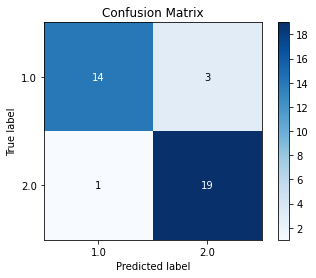

In [21]:
plot_confusion_matrix(y_test, y_pred)

### Máquina de soporte de vectores

In [22]:
svm_gs = GridSearchCV(SVC(), param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'random_state': [43],
    'probability': [True]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
svm_gs.fit(X_train, y_train)
svm_gs.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    3.5s finished


{'C': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 43,
 'tol': 0.1}

In [23]:
results, y_pred = train_test_model(model=SVC,
                           model_name='Support Vector Machine',
                           params=svm_gs.best_params_,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test,
                           results=results)

The accuracy score is: 0.8918918918918919
The precision score is: 0.8823529411764706
The recall score is: 0.8823529411764706
The F1 score is: 0.8823529411764706


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

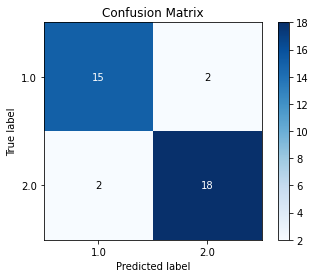

In [24]:
plot_confusion_matrix(y_test, y_pred)

### Árbol de decisión

In [25]:
dtc_gs = GridSearchCV(DecisionTreeClassifier(), param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [43]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
dtc_gs.fit(X_train, y_train)
dtc_gs.best_params_

Fitting 5 folds for each of 176 candidates, totalling 880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 880 out of 880 | elapsed:    1.5s finished


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'random_state': 43,
 'splitter': 'random'}

In [26]:
results, y_pred = train_test_model(model=DecisionTreeClassifier,
                           model_name='Decision Tree',
                           params=dtc_gs.best_params_,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test,
                           results=results)

The accuracy score is: 0.8108108108108109
The precision score is: 0.8571428571428571
The recall score is: 0.7058823529411765
The F1 score is: 0.7741935483870968


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

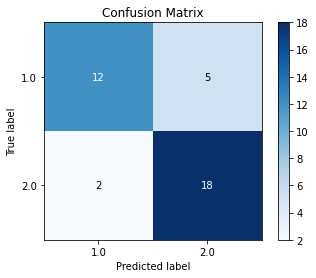

In [27]:
plot_confusion_matrix(y_test, y_pred)

### Bosque aleatorio

In [28]:
rfc_gs = GridSearchCV(RandomForestClassifier(), param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [1, 2, 3, 4, 5, 6 ,7 ,8, 9, 10, None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [43]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
rfc_gs.fit(X_train, y_train)
rfc_gs.best_params_

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1760 out of 1760 | elapsed:  1.6min finished


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200,
 'random_state': 43}

In [29]:
results, y_pred = train_test_model(model=RandomForestClassifier,
                           model_name='Random Forest',
                           params=rfc_gs.best_params_,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test,
                           results=results)

The accuracy score is: 0.8648648648648649
The precision score is: 0.875
The recall score is: 0.8235294117647058
The F1 score is: 0.8484848484848485


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

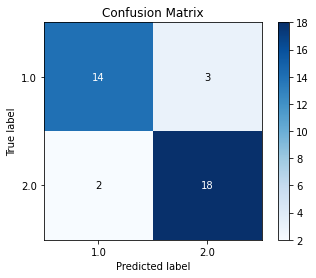

In [30]:
plot_confusion_matrix(y_test, y_pred)

### K Nearest Neighbors

In [31]:
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
knn_gs.fit(X_train, y_train)
knn_gs.best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.5s finished


{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [32]:
results, y_pred = train_test_model(model=KNeighborsClassifier,
                           model_name='K Nearest Neighbors',
                           params=knn_gs.best_params_,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test,
                           results=results)

The accuracy score is: 0.918918918918919
The precision score is: 0.9375
The recall score is: 0.8823529411764706
The F1 score is: 0.9090909090909091


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

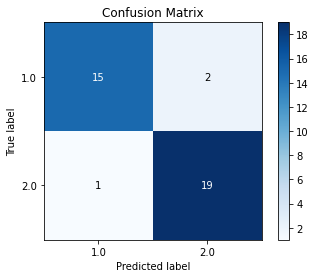

In [33]:
plot_confusion_matrix(y_test, y_pred)

### Perceptron

In [34]:
p_gs = GridSearchCV(Perceptron(), param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001],
    'max_iter': [100, 1000, 10000],
    'tol': [1, 0.1, 0.01, 0.001, 0.0001],
    'early_stopping': [False, True]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
p_gs.fit(X_train, y_train)
p_gs.best_params_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2115 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:    4.9s finished


{'alpha': 0.0001,
 'early_stopping': True,
 'max_iter': 100,
 'penalty': 'l1',
 'tol': 0.1}

In [35]:
results, y_pred = train_test_model(model=Perceptron,
                           model_name='Perceptron',
                           params=p_gs.best_params_,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test,
                           results=results)

The accuracy score is: 0.5945945945945946
The precision score is: 0.53125
The recall score is: 1.0
The F1 score is: 0.6938775510204082


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

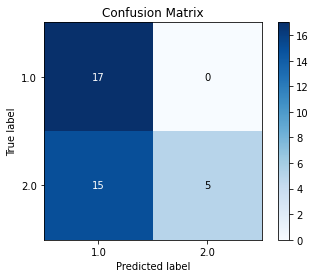

In [36]:
plot_confusion_matrix(y_test, y_pred)

### Ada Boost

In [37]:
ab_gs = GridSearchCV(AdaBoostClassifier(), param_grid = {
    'learning_rate': [1, 0.1, 0.01, 0.001, 0.0001],
    'n_estimators': [50, 100, 200, 400],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [43]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
ab_gs.fit(X_train, y_train)
ab_gs.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.4s finished


{'algorithm': 'SAMME.R',
 'learning_rate': 1,
 'n_estimators': 400,
 'random_state': 43}

In [38]:
results, y_pred = train_test_model(model=AdaBoostClassifier,
                           model_name='Ada Boost',
                           params=ab_gs.best_params_,
                           X_train=X_train,
                           y_train=y_train,
                           X_test=X_test,
                           y_test=y_test,
                           results=results)

The accuracy score is: 0.8108108108108109
The precision score is: 0.8571428571428571
The recall score is: 0.7058823529411765
The F1 score is: 0.7741935483870968


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

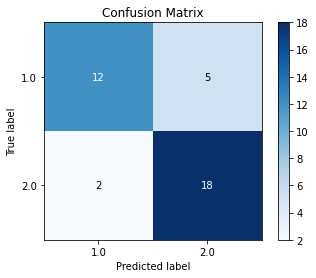

In [39]:
plot_confusion_matrix(y_test, y_pred)

### Gradient Boosting

In [40]:
gb_gs = GridSearchCV(GradientBoostingClassifier(), param_grid = {
    'learning_rate': [1, 0.1, 0.01, 0.001, 0.0001],
    'n_estimators': [50, 100, 200, 400],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'max_depth': range(1, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [43]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
gb_gs.fit(X_train, y_train)
gb_gs.best_params_

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2650 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4250 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5200 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 6250 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7400 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 8650 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 10000 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 11450 tasks     

{'criterion': 'friedman_mse',
 'learning_rate': 1,
 'loss': 'exponential',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 100,
 'random_state': 43}

In [41]:
results, y_pred = train_test_model(model=GradientBoostingClassifier,
                                   model_name='Gradient Boosting',
                                   params=gb_gs.best_params_,
                                   X_train=X_train,
                                   y_train=y_train,
                                   X_test=X_test,
                                   y_test=y_test,
                                   results=results)

The accuracy score is: 0.8918918918918919
The precision score is: 0.8823529411764706
The recall score is: 0.8823529411764706
The F1 score is: 0.8823529411764706


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

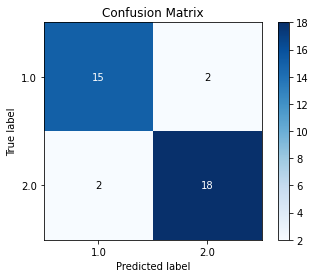

In [42]:
plot_confusion_matrix(y_test, y_pred)

### Voting

In [43]:
v_gs = GridSearchCV(VotingClassifier(estimators=[
    ('lr', LogisticRegression(**lr_gs.best_params_)),
    ('svm', SVC(**svm_gs.best_params_)),
    ('dt', DecisionTreeClassifier(**dtc_gs.best_params_)),
    ('rf', RandomForestClassifier(**rfc_gs.best_params_)),
    ('knn', KNeighborsClassifier(**knn_gs.best_params_)),
    ('ab', AdaBoostClassifier(**ab_gs.best_params_)),
    ('gb', GradientBoostingClassifier(**gb_gs.best_params_))
]), param_grid = {
    'voting': ['soft', 'hard'],
    'flatten_transform': [True, False]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
v_gs.fit(X_train, y_train)
v_gs.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.2s finished
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'flatten_transform': True, 'voting': 'soft'}

In [44]:
results, y_pred = train_test_model(model=VotingClassifier,
                                   estimators=[
                                                ('lr', LogisticRegression(**lr_gs.best_params_)),
                                                ('svm', SVC(**svm_gs.best_params_)),
                                                ('dt', DecisionTreeClassifier(**dtc_gs.best_params_)),
                                                ('rf', RandomForestClassifier(**rfc_gs.best_params_)),
                                                ('knn', KNeighborsClassifier(**knn_gs.best_params_)),
                                                ('ab', AdaBoostClassifier(**ab_gs.best_params_)),
                                                ('gb', GradientBoostingClassifier(**gb_gs.best_params_))
                                            ],
                                   model_name='Voting',
                                   params=v_gs.best_params_,
                                   X_train=X_train,
                                   y_train=y_train,
                                   X_test=X_test,
                                   y_test=y_test,
                                   results=results)

/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


The accuracy score is: 0.8918918918918919
The precision score is: 0.8823529411764706
The recall score is: 0.8823529411764706
The F1 score is: 0.8823529411764706


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

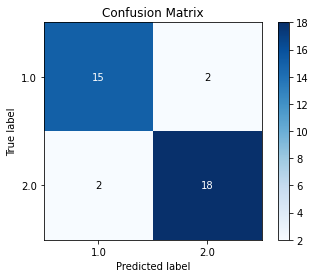

In [45]:
plot_confusion_matrix(y_test, y_pred)

### Stacking

In [46]:
s_gs = GridSearchCV(StackingClassifier(estimators=[
    ('lr', LogisticRegression(**lr_gs.best_params_)),
    ('svm', SVC(**svm_gs.best_params_)),
    ('dt', DecisionTreeClassifier(**dtc_gs.best_params_)),
    ('rf', RandomForestClassifier(**rfc_gs.best_params_)),
    ('knn', KNeighborsClassifier(**knn_gs.best_params_)),
    ('ab', AdaBoostClassifier(**ab_gs.best_params_)),
    ('gb', GradientBoostingClassifier(**gb_gs.best_params_))
]), param_grid = {
    'stack_method': ['auto', 'predict_proba', 'decision_function', 'predict'],
    'passthrough': [True, False]
}, scoring = {
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score)
}, refit='Accuracy', n_jobs=-1, verbose=1)
s_gs.fit(X_train, y_train)
s_gs.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   37.9s finished
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: C

{'passthrough': False, 'stack_method': 'auto'}

In [47]:
results, y_pred = train_test_model(model=StackingClassifier,
                                   estimators=[
                                                ('lr', LogisticRegression(**lr_gs.best_params_)),
                                                ('svm', SVC(**svm_gs.best_params_)),
                                                ('dt', DecisionTreeClassifier(**dtc_gs.best_params_)),
                                                ('rf', RandomForestClassifier(**rfc_gs.best_params_)),
                                                ('knn', KNeighborsClassifier(**knn_gs.best_params_)),
                                                ('ab', AdaBoostClassifier(**ab_gs.best_params_)),
                                                ('gb', GradientBoostingClassifier(**gb_gs.best_params_))
                                            ],
                                   model_name='Stacking',
                                   params=s_gs.best_params_,
                                   X_train=X_train,
                                   y_train=y_train,
                                   X_test=X_test,
                                   y_test=y_test,
                                   results=results)

/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/hans/Proyectos/Python/Tesis_Chatbot/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ha

The accuracy score is: 0.8918918918918919
The precision score is: 0.8823529411764706
The recall score is: 0.8823529411764706
The F1 score is: 0.8823529411764706


#### Matriz de confusión

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

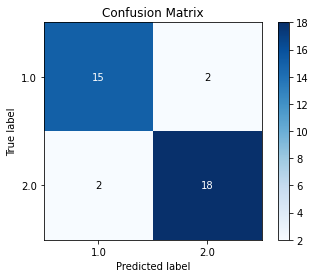

In [48]:
plot_confusion_matrix(y_test, y_pred)

## Resultados

In [59]:
results['Promedio'] = results.mean(axis=1)
results = results.append(pd.DataFrame(results.mean().to_dict(), index=['Promedio']))
results

,accuracy,precision,recall,f1 score,Promedio
Logistic Regression,0.891892,0.933333,0.823529,0.875000,0.880939
Support Vector Machine,0.891892,0.882353,0.882353,0.882353,0.884738
Decision Tree,0.810811,0.857143,0.705882,0.774194,0.787007
Random Forest,0.864865,0.875000,0.823529,0.848485,0.852970
K Nearest Neighbors,0.918919,0.937500,0.882353,0.909091,0.911966
Perceptron,0.594595,0.531250,1.000000,0.693878,0.704931
Ada Boost,0.810811,0.857143,0.705882,0.774194,0.787007
Gradient Boosting,0.891892,0.882353,0.882353,0.882353,0.884738
Voting,0.891892,0.882353,0.882353,0.882353,0.884738
Stacking,0.891892,0.882353,0.882353,0.882353,0.884738


# Entrenando el mejor clasificador

In [3]:
texts = ObtainedTextDA().select_all_as_dataframe().drop(columns=['id', 'filename', 'category', 'cluster_grade'])
data_columns = [c for c in texts.columns if c not in ['category', 'filename', 'grade', 'id']]
# SCALER
scaler = MinMaxScaler()
scaler.fit(texts[data_columns])
texts[data_columns] = scaler.transform(texts[data_columns])
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(texts[data_columns], texts[['grade']], random_state=43, test_size=0.2, stratify=texts[['grade']])
# MODEL TRAINING
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=1, p=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_scores(y_test, y_pred)
# Storing the model and scaler
pickle.dump(knn, open(f'{BASE_DIRECTORY}/model/classifier.pkl', 'ab'))
pickle.dump(scaler, open(f'{BASE_DIRECTORY}/model/scaler.pkl', 'ab'))

The accuracy score is: 0.918918918918919
The precision score is: 0.9375
The recall score is: 0.8823529411764706
The F1 score is: 0.9090909090909091


<ipython-input-3-de6757d77290>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
